In [1]:
import pandas as pd
import numpy as np
import pickle


import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

import itertools
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


df_train = pd.read_csv('data/t2e/text_train.csv')
df_test = pd.read_csv('data/t2e/text_test.csv')

df = pd.concat([df_train, df_test], ignore_index=True)
display(df.head())


,wav_file,label,transcription
0,Ses01M_script01_1_F001,4,when ?
1,Ses01M_impro04_F000,5,you seem kind of down .
2,Ses01M_script02_2_M030,5,you want to get married again ?
3,Ses01F_impro03_M018,4,wow .
4,Ses01F_script03_1_F002,3,it had to happen sooner or later . what are we...


In [2]:
# Menampilkan 5 baris pertama data training
print("Sample data training (5 baris pertama):")
print(df_train[:5])

# Menampilkan 5 baris pertama data testing
print("\nSample data testing (5 baris pertama):")
print(df_test[:5])

Sample data training (5 baris pertama):
                 wav_file  label  \
0  Ses01M_script01_1_F001      4   
1     Ses01M_impro04_F000      5   
2  Ses01M_script02_2_M030      5   
3     Ses01F_impro03_M018      4   
4  Ses01F_script03_1_F002      3   

                                       transcription  
0                                             when ?  
1                            you seem kind of down .  
2                    you want to get married again ?  
3                                              wow .  
4  it had to happen sooner or later . what are we...  

Sample data testing (5 baris pertama):
                 wav_file  label  \
0     Ses01F_impro05_F028      0   
1  Ses01F_script03_1_F001      3   
2  Ses01F_script03_1_M002      3   
3     Ses01M_impro02_F002      4   
4  Ses01M_script03_1_F002      3   

                                       transcription  
0                              okay . i ll do that .  
1  freda is the only one who knows we are here

In [3]:
col = ['label', 'transcription']
df = df[col]

In [4]:
df.columns

Index(['label', 'transcription'], dtype='object')

In [5]:
df.columns = ['label', 'transcription']

In [6]:
category_to_id = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}
id_to_category = {0: 'ang', 1: 'hap', 2: 'sad', 3: 'fea', 4: 'sur', 5: 'neu'}

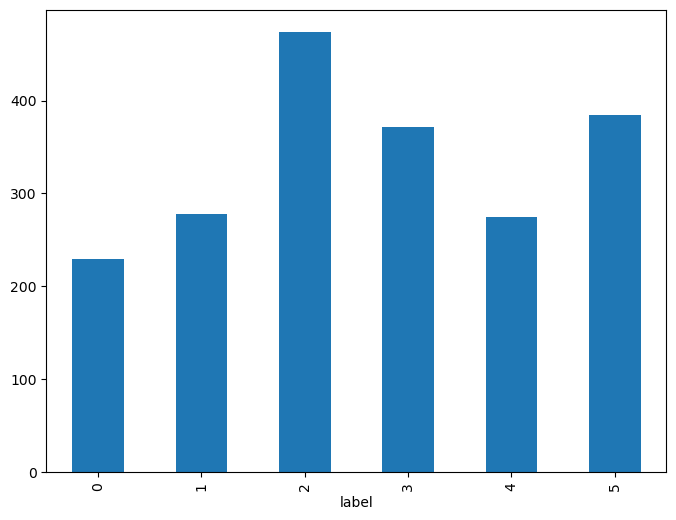

In [7]:
fig = plt.figure(figsize=(8,6))
df.groupby('label').transcription.count().plot.bar(ylim=0)
plt.show()

In [8]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.transcription).toarray()

labels = df.label
print(features.shape)

(2012, 328)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.20)
# count_vect = CountVectorizer()
# x_train_counts = count_vect.fit_transform(x_train)
# tfidf_transformer = TfidfTransformer()
# x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

In [10]:
# Menampilkan 5 baris pertama data training
print("Sample data training (5 baris pertama):")
print(x_train[:5])

# Menampilkan 5 baris pertama data testing
print("\nSample data testing (5 baris pertama):")
print(x_test[:5])


Sample data training (5 baris pertama):
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.54565032 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

Sample data testing (5 baris pertama):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}

emo_keys = list(['ang', 'hap', 'sad', 'fea', 'sur', 'neu'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys)

In [12]:
# Menampilkan 5 baris pertama data training
print("Sample data training (5 baris pertama):")
print(x_train[:5])

# Menampilkan 5 baris pertama data testing
print("\nSample data testing (5 baris pertama):")
print(y_train[:5])


Sample data training (5 baris pertama):
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.54565032 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

Sample data testing (5 baris pertama):
224     3
585     2
474     2
114     0
1964    0
Name: label, dtype: int64


Test Set Accuracy =  0.526
Test Set F-score =  0.532
Test Set Precision =  0.608
Test Set Recall =  0.522
Confusion matrix, without normalization
[[ 8  3 32  0  1  7]
 [ 2 24 23  0  2 11]
 [ 3  5 62  0  2 15]
 [ 0  0 17 48  0  0]
 [ 0  0  4  3 46  1]
 [ 3 10 46  1  0 24]]


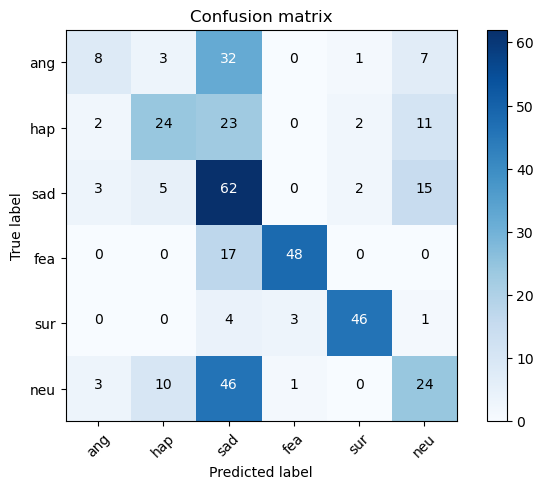

In [13]:
rf_classifier = RandomForestClassifier(n_estimators=600, min_samples_split=25)
rf_classifier.fit(x_train, y_train)

# Predict
pred_probs = rf_classifier.predict_proba(x_test)

# Results
display_results(y_test, pred_probs)

with open('pred_probas/text_rf_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

c:\Users\Unity_Comp\anaconda3\envs\cudaRun\lib\site-packages\xgboost\training.py:183: UserWarning: [09:07:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Set Accuracy =  0.521
Test Set F-score =  0.523
Test Set Precision =  0.619
Test Set Recall =  0.515
Confusion matrix, without normalization
[[ 7  3 30  0  1 10]
 [ 3 22 27  0  1  9]
 [ 3  4 67  0  2 11]
 [ 0  0 17 48  0  0]
 [ 0  0  4  3 46  1]
 [ 1  5 57  1  0 20]]


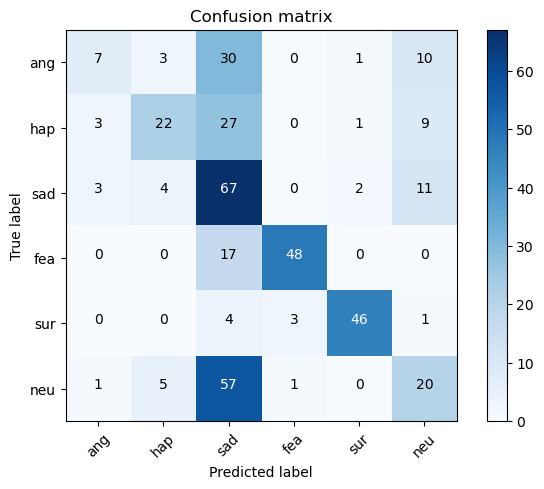

In [14]:
xgb_classifier = xgb.XGBClassifier(max_depth=7, learning_rate=0.008, objective='multi:softprob', 
                                   n_estimators=600, sub_sample=0.8, num_class=len(emotion_dict),
                                   booster='gbtree', n_jobs=4)
xgb_classifier.fit(x_train, y_train)

# Predict
pred_probs = xgb_classifier.predict_proba(x_test)

# Results
display_results(y_test, pred_probs)

with open('pred_probas/text_xgb_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

Test Set Accuracy =  0.533
Test Set F-score =  0.544
Test Set Precision =  0.577
Test Set Recall =  0.531
Confusion matrix, without normalization
[[ 9  4 17  0  1 20]
 [ 6 25 14  0  1 16]
 [ 6  8 44  2  2 25]
 [ 0  0  0 48  0 17]
 [ 0  0  0  3 46  5]
 [ 4 12 24  1  0 43]]


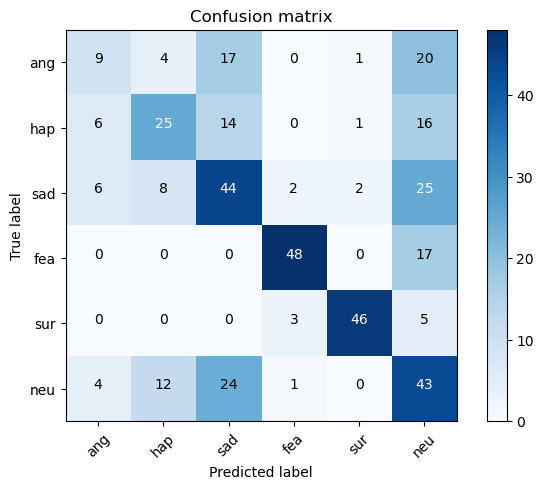

In [15]:
svc_classifier = LinearSVC()

svc_classifier.fit(x_train, y_train)

# Predict
pred = svc_classifier.predict(x_test)

# Results
one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emotion_dict.keys())
(y_test, pred_probs)

with open('pred_probas/text_svc_classifier_model.pkl', 'wb') as f:
    pickle.dump(svc_classifier, f)

Test Set Accuracy =  0.543
Test Set F-score =  0.530
Test Set Precision =  0.628
Test Set Recall =  0.532
Confusion matrix, without normalization
[[ 6  3 31  0  2  9]
 [ 0 22 20  4  1 15]
 [ 3  3 67  1  2 11]
 [ 0  0 17 48  0  0]
 [ 0  0  4  3 46  1]
 [ 0  8 39  6  1 30]]


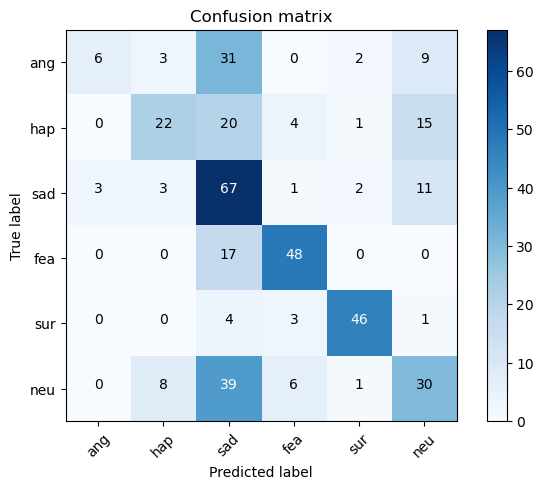

In [16]:
mnb_classifier = MultinomialNB()

mnb_classifier.fit(x_train, y_train)

# Predict
pred_probs = mnb_classifier.predict_proba(x_test)

# Results
display_results(y_test, pred_probs)

with open('pred_probas/text_mnb_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

Test Set Accuracy =  0.533
Test Set F-score =  0.551
Test Set Precision =  0.601
Test Set Recall =  0.538
Confusion matrix, without normalization
[[12  6 27  0  1  5]
 [ 6 31 13  0  1 11]
 [ 5  9 57  0  0 16]
 [ 0  0 17 48  0  0]
 [ 0  0  5  3 46  0]
 [ 5 10 47  1  0 21]]


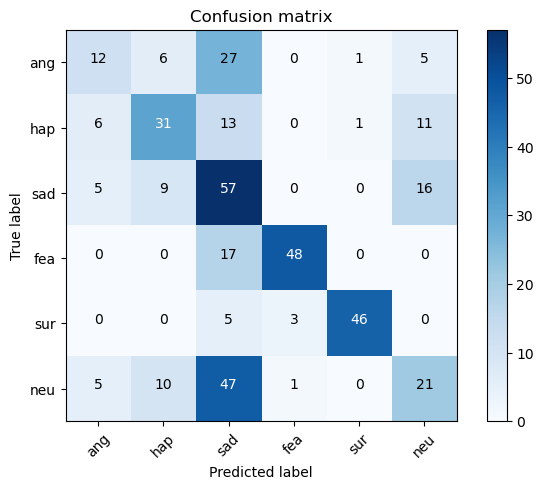

In [17]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(500, ), activation='relu', solver='adam', alpha=0.0001,
                               batch_size='auto', learning_rate='adaptive', learning_rate_init=0.01,
                               power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001,
                               verbose=False, warm_start=True, momentum=0.8, nesterovs_momentum=True,
                               early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                               epsilon=1e-08)

mlp_classifier.fit(x_train, y_train)

# Predict
pred_probs = mlp_classifier.predict_proba(x_test)

# Results
display_results(y_test, pred_probs)

with open('pred_probas/text_mlp_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

c:\Users\Unity_Comp\anaconda3\envs\cudaRun\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test Set Accuracy =  0.536
Test Set F-score =  0.535
Test Set Precision =  0.615
Test Set Recall =  0.529
Confusion matrix, without normalization
[[ 8  3 29  0  1 10]
 [ 3 22 19  3  1 14]
 [ 3  5 63  2  2 12]
 [ 0  0 17 48  0  0]
 [ 0  0  4  3 46  1]
 [ 0  7 45  1  2 29]]


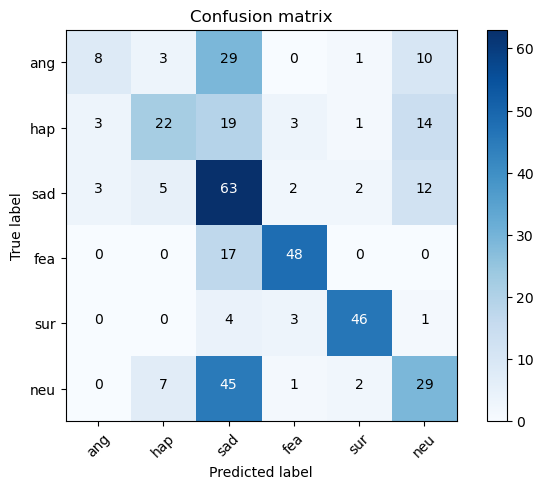

In [18]:
lr_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

lr_classifier.fit(x_train, y_train)

# Predict
pred_probs = lr_classifier.predict_proba(x_test)

# Results
display_results(y_test, pred_probs)

with open('pred_probas/text_lr_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

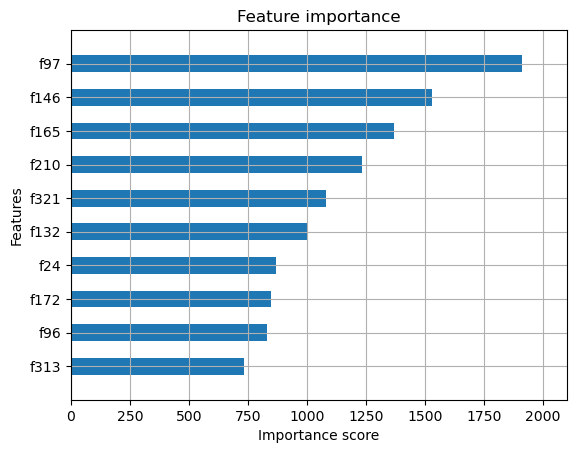

In [19]:
ax = xgb.plot_importance(xgb_classifier, max_num_features=10, height=0.5, show_values=False)

In [20]:
contribution_scores = xgb_classifier.feature_importances_
contribution_scores

array([5.29834535e-03, 2.06321152e-03, 7.35129742e-03, 2.84961867e-03,
       0.00000000e+00, 5.06144483e-03, 2.32590875e-03, 0.00000000e+00,
       0.00000000e+00, 1.04574114e-02, 3.17785423e-03, 1.10608609e-02,
       1.76093187e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.52219234e-02, 2.82332581e-03, 0.00000000e+00, 0.00000000e+00,
       5.88057516e-03, 0.00000000e+00, 0.00000000e+00, 7.11190654e-03,
       1.50476806e-02, 0.00000000e+00, 1.56417005e-02, 3.62766418e-03,
       0.00000000e+00, 4.25653765e-03, 0.00000000e+00, 4.35739616e-03,
       3.06295324e-03, 4.15551150e-03, 0.00000000e+00, 0.00000000e+00,
       3.55868135e-03, 0.00000000e+00, 3.71711771e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.53241223e-03, 4.87154350e-03,
       4.69824020e-03, 2.93859411e-02, 0.00000000e+00, 0.00000000e+00,
       2.72025377e-03, 3.66581371e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.36784536e-02, 0.00000000e+00, 4.83657874e-04,
      

In [21]:
# with open('pred_probas/text_lstm_classifier.pkl', 'rb') as f:
#     lstm_pred_probs = pickle.load(f)
    
# display_results(y_test, lstm_pred_probs)

Test Set Accuracy =  0.551
Test Set F-score =  0.558
Test Set Precision =  0.619
Test Set Recall =  0.546
Confusion matrix, without normalization
[[ 9  5 28  0  1  8]
 [ 4 28 19  0  1 10]
 [ 3  7 61  0  2 14]
 [ 0  0 17 48  0  0]
 [ 0  0  4  3 46  1]
 [ 4  8 41  1  0 30]]


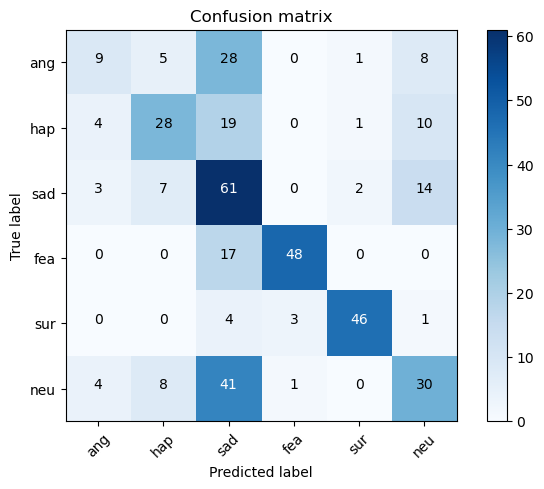

In [22]:
# Load predicted probabilities
with open('pred_probas/text_rf_classifier.pkl', 'rb') as f:
    rf_pred_probs = pickle.load(f)

with open('pred_probas/text_xgb_classifier.pkl', 'rb') as f:
    xgb_pred_probs = pickle.load(f)
    
with open('pred_probas/text_svc_classifier_model.pkl', 'rb') as f:
    svc_preds = pickle.load(f)
    
with open('pred_probas/text_mnb_classifier.pkl', 'rb') as f:
    mnb_pred_probs = pickle.load(f)
    
with open('pred_probas/text_mlp_classifier.pkl', 'rb') as f:
    mlp_pred_probs = pickle.load(f)
    
with open('pred_probas/text_lr_classifier.pkl', 'rb') as f:
    lr_pred_probs = pickle.load(f)


# Average of the predicted probabilites
ensemble_pred_probs = (xgb_pred_probs +
                       mlp_pred_probs +
                       rf_pred_probs +
                       mnb_pred_probs +
                       lr_pred_probs)/5.0


# Show metrics
display_results(y_test, ensemble_pred_probs)

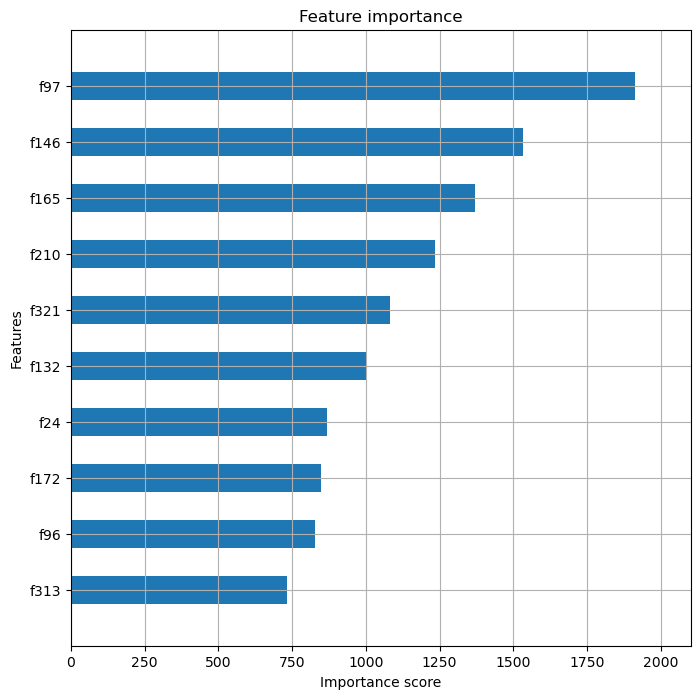

In [23]:
ax = xgb.plot_importance(xgb_classifier, max_num_features=10, height=0.5, show_values=False)
fig = ax.figure
fig.set_size_inches(8, 8)

In [24]:
contribution_scores = xgb_classifier.feature_importances_
contribution_scores

array([5.29834535e-03, 2.06321152e-03, 7.35129742e-03, 2.84961867e-03,
       0.00000000e+00, 5.06144483e-03, 2.32590875e-03, 0.00000000e+00,
       0.00000000e+00, 1.04574114e-02, 3.17785423e-03, 1.10608609e-02,
       1.76093187e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.52219234e-02, 2.82332581e-03, 0.00000000e+00, 0.00000000e+00,
       5.88057516e-03, 0.00000000e+00, 0.00000000e+00, 7.11190654e-03,
       1.50476806e-02, 0.00000000e+00, 1.56417005e-02, 3.62766418e-03,
       0.00000000e+00, 4.25653765e-03, 0.00000000e+00, 4.35739616e-03,
       3.06295324e-03, 4.15551150e-03, 0.00000000e+00, 0.00000000e+00,
       3.55868135e-03, 0.00000000e+00, 3.71711771e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.53241223e-03, 4.87154350e-03,
       4.69824020e-03, 2.93859411e-02, 0.00000000e+00, 0.00000000e+00,
       2.72025377e-03, 3.66581371e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.36784536e-02, 0.00000000e+00, 4.83657874e-04,
      

In [25]:
import xgboost as xgb
print(xgb.__version__)


3.0.1


In [26]:

%pip install --upgrade "xgboost>=1.7.3"

# Pastikan xgb_classifier sudah fit dulu
xgb_classifier.fit(x_train, y_train)

top_n = [100, 400, 500, 600]  # number of features
for n in top_n:
    threshold_index = np.argsort(contribution_scores)[::-1][:n][-1]
    threshold_value = contribution_scores[threshold_index]
    print('Stats for top {} features:'.format(n))
    
    # Select features using threshold
    selection = SelectFromModel(xgb_classifier, threshold=threshold_value, prefit=True)
    select_x_train = selection.transform(x_train)
    select_x_test = selection.transform(x_test)
    
    # Train
    select_xgb_classifier = xgb.XGBClassifier(
        max_depth=7,
        learning_rate=0.008,
        objective='multi:softprob',
        n_estimators=600,
        subsample=0.8,  # perbaikan parameter
        num_class=len(emotion_dict),
        booster='gbtree',
        n_jobs=4
    )
    select_xgb_classifier.fit(select_x_train, y_train)

    # Predict
    pred_probs = select_xgb_classifier.predict_proba(select_x_test)

    # Results
    display_results(y_test, pred_probs, cm=False)


Note: you may need to restart the kernel to use updated packages.


c:\Users\Unity_Comp\anaconda3\envs\cudaRun\lib\site-packages\xgboost\training.py:183: UserWarning: [09:07:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Stats for top 100 features:
Test Set Accuracy =  0.516
Test Set F-score =  0.513
Test Set Precision =  0.625
Test Set Recall =  0.510
Stats for top 400 features:
Test Set Accuracy =  0.511
Test Set F-score =  0.517
Test Set Precision =  0.623
Test Set Recall =  0.507
Stats for top 500 features:
Test Set Accuracy =  0.511
Test Set F-score =  0.517
Test Set Precision =  0.623
Test Set Recall =  0.507
Stats for top 600 features:
Test Set Accuracy =  0.511
Test Set F-score =  0.517
Test Set Precision =  0.623
Test Set Recall =  0.507
